<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Data

> The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

> One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this lab, we'll explore this dataset to find insight.

[Titanic Dataset](https://www.kaggle.com/c/titanic/data)

# Data Dictionary

| Variable |                                 Definition | Key                                            |
|----------|-------------------------------------------:|------------------------------------------------|
| Survival | Survival                                   | 0 = No, 1 = Yes                                |
| Pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| Sex      | Sex                                        |                                                |
| Age      | Age in years                               |                                                |
| SibSp    | # of siblings / spouses aboard the Titanic |                                                |
| Parch    | # of parents / children aboard the Titanic |                                                |
| Ticket   | Ticket number                              |                                                |
| Fare     | Passenger fare                             |                                                |
| Cabin    | Cabin number                               |                                                |
| Embarked | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |

# Loading Modules

In [16]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Loading Dataset

Read titanic dataset.

In [115]:
# Read Titanic Dataset
titanic_csv = 'titanic.csv'
titanic = pd.read_csv(titanic_csv)

# Explore Dataset

## Head

In [116]:
# Check Head
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Tail

In [117]:
# Check Tail
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## Shape

Find shape of dataset.

In [118]:
# ANSWER
titanic.shape

(891, 12)

## Check Types of Data

Check types of data you have

In [21]:
# ANSWER
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Check Null Values

Check whether dataset have any null values.

In [119]:
# ANSWER
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [120]:
# melt() function is useful to massage a DataFrame into a format where one or more columns are identifier variables (id_vars), while all other columns, considered measured variables (value_vars), are “unpivoted” to the row axis, leaving just two non-identifier columns, ‘variable’ and ‘value’. 
titanic_long= pd.melt(titanic, id_vars='PassengerId')
titanic_long.head()

,PassengerId,variable,value
0,1,Survived,0
1,2,Survived,1
2,3,Survived,1
3,4,Survived,1
4,5,Survived,0


In [121]:
# The levels in the pivot table will be stored in Multilndex objetcs (hierarchical indexes) on the index and columns of the result dataframe. 
pd.pivot(titanic_long, index='PassengerId', columns='variable').droplevel(level=0, axis=1)

variable,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1,22,NaN,S,7.25,"Braund, Mr. Owen Harris",0,3,male,1,0,A/5 21171
2,38,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1,PC 17599
3,26,NaN,S,7.925,"Heikkinen, Miss. Laina",0,3,female,0,1,STON/O2. 3101282
4,35,C123,S,53.1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1,113803
5,35,NaN,S,8.05,"Allen, Mr. William Henry",0,3,male,0,0,373450
...,...,...,...,...,...,...,...,...,...,...,...
887,27,NaN,S,13,"Montvila, Rev. Juozas",0,2,male,0,0,211536
888,19,B42,S,30,"Graham, Miss. Margaret Edith",0,1,female,0,1,112053
889,NaN,NaN,S,23.45,"Johnston, Miss. Catherine Helen ""Carrie""",2,3,female,1,0,W./C. 6607


In [122]:
# Check titanic data again
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Fill Null Values

Is there any null values in any columns? 

- Identify those columns
- Fill those null values using your own logic
    - State your logic behind every steps

### Age

In [24]:
# ANSWER: To find the nul values for Age
titanic.Age.isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [57]:
# To count age values
titanic['Age'].value_counts()

29.00    144
27.00     71
24.00     30
22.00     27
18.00     26
        ... 
55.50      1
66.00      1
70.50      1
23.50      1
0.42       1
Name: Age, Length: 88, dtype: int64

In [25]:
# To count how many null values Age column has. There are 177 missing data from the 891 total observations
titanic.Age.isnull().sum()

177

In [123]:
# To map the null age values in the data set. 
titanic[titanic.Age.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [107]:
# Grouping mean age, by sex and Pclass to determine how to replace null values for Age. 
titanic.groupby(['Pclass', 'Sex']) [['Age']].mean()

Age
Pclass Sex              
1      female  34.611765
       male    41.281386
2      female  28.722973
       male    30.740707
3      female  21.750000
       male    26.507589

In [108]:
# Check Age
# Check Median Age of Male, Female
# Using median values of Male & Female to fill null those values.
titanic['Age'].fillna(titanic.groupby(by=['Sex'])['Age'].transform("median"), inplace=True) 

In [124]:
# To check dataset with the after filling age null values
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [113]:
# To check again null values in column Age.
titanic.Age.isnull().sum()

0

### Cabin

In [125]:
# To count how many null values cabin column has. There are 687 missing values from the 891 total observations
titanic.Cabin.isnull().sum()

687

In [126]:
# ASNWER: To find the null values for cabin
titanic.Cabin.isnull()

0       True
1      False
2       True
3      False
4       True
       ...  
886     True
887    False
888     True
889    False
890     True
Name: Cabin, Length: 891, dtype: bool

In [127]:
# To map the null cabin values in the data set. 
titanic[titanic.Cabin.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [130]:
# Considerin that more than 77% of the cabin values are missing; it is better to drop this column for the data set.
# To do not make changes in the original one, we change the name before deleting the column
titanic1 = pd.read_csv("titanic.csv")

In [132]:
# We can delete the column using teh function del()
del titanic1['Cabin']

In [133]:
# We can confirm that the column has been deleted using the function head()
titanic1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [134]:
# We can also call again the shape to verify that we have only 11 columns
titanic1.shape

(891, 11)

### Embarked

In [141]:
titanic1[titanic1['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [142]:
titanic1.Embarked.isnull().sum()

2

In [143]:
# ANSWER
titanic1.Embarked.isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Embarked, Length: 891, dtype: bool

In [144]:
# To count embarked values
titanic1['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [145]:
# The value_counts() method returns a Series containing the counts of unique values. 
# This means, for any column in a dataframe, this method returns the count of unique entries in that column.
# Sometimes, getting a percentage is a better criterion then the count. 
# By setting normalize=True, the object returned will contain the relative frequencies of the unique values. 
titanic1['Embarked'].value_counts(normalize=True)

S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64

In [146]:
# Embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
# The value.counts(normalize=True) is telling us that more than 72% of the passanger embarked at Southhampton.
# So it is OK to assign the 2 missing values to this port
# To do that we can use lambda to replace the null value for S
titanic1['Embarked'] = titanic1['Embarked'].apply(lambda x: x if type(x) is str else 'S')

In [147]:
# We can verify if the values have been changes calling again isnull.sum() function
titanic1.Embarked.isnull().sum()

0

# Describe

Describe your dataset.

In [148]:
# ANSWER
titanic1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Relationship between Features and Survival

Find relationship between categorical features and survived.

**Describe your findings.**

In [152]:
def bar_charts(df, feature):
    '''
    Inputs:
    df: titanic1
    feature: Name of Feature to Check With Survived
    '''
    _agg = {
        'PassengerId': 'count'
    }
    _groupby = ['Survived', feature]

    df_feature = df.groupby(by=_groupby).agg(_agg)
    # Find the percentage of people survived
    # df_feature = df_feature.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
    
    ax = df_feature.unstack().plot(kind='bar', figsize=(15,6))
    plt.legend(list(df_feature.index.levels[1].unique()))
    plt.xlabel('Survived')
    plt.xticks(np.arange(2), ('No', 'Yes'))
    plt.show();

## Pclass

Use barchart to find relationship between survived and pclass.  Note your findings.

In [165]:
# To count embarked values
titanic1['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [174]:
# Grouping by Pclass and Fare to see better survival. 
titanic1.groupby(['Pclass', 'Fare']) [['Survived']] .sum()

Survived
Pclass Fare             
1      0.0000          0
       5.0000          0
       25.5875         0
       25.9250         0
       25.9292         2
...                  ...
3      34.3750         0
       39.6875         0
       46.9000         0
       56.4958         5
       69.5500         0

[255 rows x 1 columns]

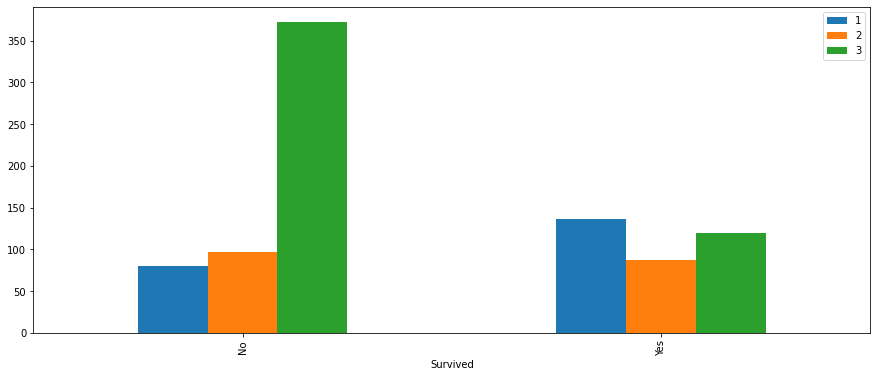

In [187]:
bar_charts(titanic1, 'Pclass')
# We can see in this graph that the majority of no survivors were in Pclass 3

## Sex

Use barchart to find relationship between survived and sex.  Note your findings.

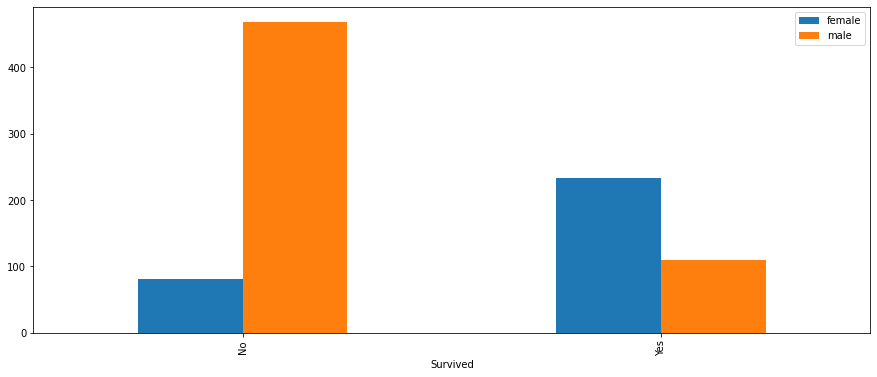

In [188]:
bar_charts(titanic1, 'Sex')
# The plot is telling us that the majority of non survivors were men

In [190]:
titanic1.groupby(['Sex']) [['Survived']].count()

,Survived
Sex,
female,314
male,577


In [185]:
titanic1.groupby(['Pclass', 'Sex']) [['Survived']].count()
# This table tell us that the number of survivors by gender and Pclass. 
# Again the majority of survivors (men or women) were in Pclass 3

Survived
Pclass Sex             
1      female        94
       male         122
2      female        76
       male         108
3      female       144
       male         347

## Parch

Parch = Number of parents of children travelling with each passenger.

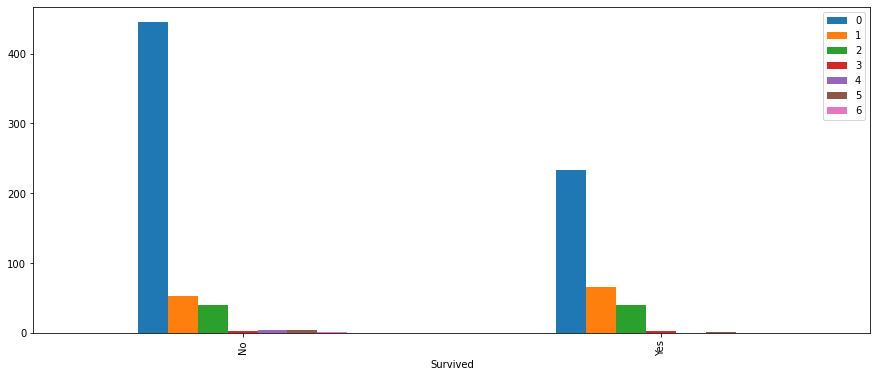

In [186]:
# ANSWER
bar_charts(titanic1, 'Parch')

In [191]:
titanic1.groupby(['Parch']) [['Survived']].count()
# The table and graph show that the survival also depended on the size of the family group. For people travelling alone, there were more chance of survival.

,Survived
Parch,
0,678
1,118
2,80
3,5
4,4
5,5
6,1


In [199]:
titanic1.groupby(['Parch', 'Sex']) [['Survived']].count()

Survived
Parch Sex             
0     female       194
      male         484
1     female        60
      male          58
2     female        49
      male          31
3     female         4
      male           1
4     female         2
      male           2
5     female         4
      male           1
6     female         1

## SibSp

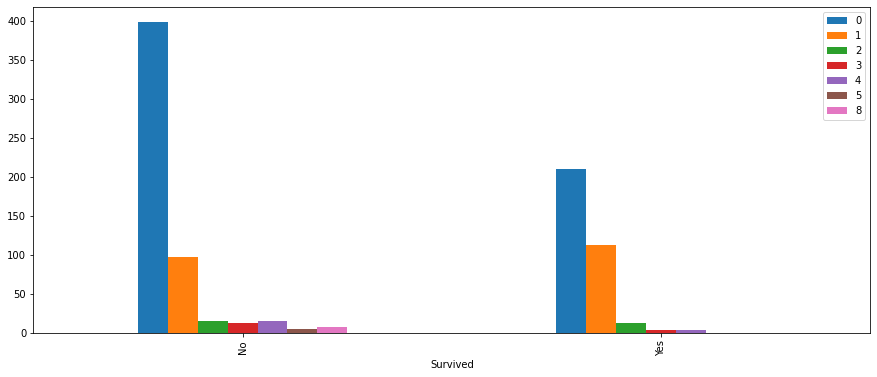

In [192]:
bar_charts(titanic1, 'SibSp')
# of siblings / spouses aboard the Titanic

In [193]:
titanic1.groupby(['SibSp']) [['Survived']].count()
# The table and graph show that the survival also depended on the of siblings / spouses aboard. Again, for groups of zero siblings/spouses, there were more chance of survival.

,Survived
SibSp,
0,608
1,209
2,28
3,16
4,18
5,5
8,7


In [200]:
titanic1.groupby(['SibSp', 'Sex']) [['Survived']].count()

Survived
SibSp Sex             
0     female       174
      male         434
1     female       106
      male         103
2     female        13
      male          15
3     female        11
      male           5
4     female         6
      male          12
5     female         1
      male           4
8     female         3
      male           4

## Embarked

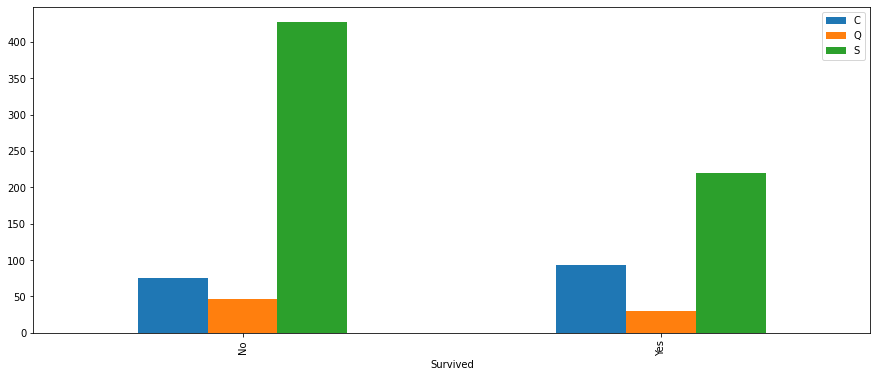

In [201]:
bar_charts(titanic1, 'Embarked')

In [202]:
titanic1.groupby(['Embarked']) [['Survived']].count()
# The table and graph show that the majority of survivors boarded the ship in Southhampton

,Survived
Embarked,
C,168
Q,77
S,646


In [203]:
titanic1.groupby(['Embarked', 'Sex']) [['Survived']].count()

Survived
Embarked Sex             
C        female        73
         male          95
Q        female        36
         male          41
S        female       205
         male         441

# Feature Engineering

Create some new features from existing feature.

## Fare Class

Create a new class based on their fare. Is there any relationship between fare and survival? 

In [194]:
def create_fare_class(x):
    if x > 30:
        fare_class = 1
    elif x > 20 and x <= 30:
        fare_class = 2
    elif x > 10 and x <= 20:
        fare_class = 3
    else:
        fare_class = 4
    return fare_class

In [195]:
# ANSWER
titanic1['FareClass'] = titanic1['Fare'].apply(create_fare_class)

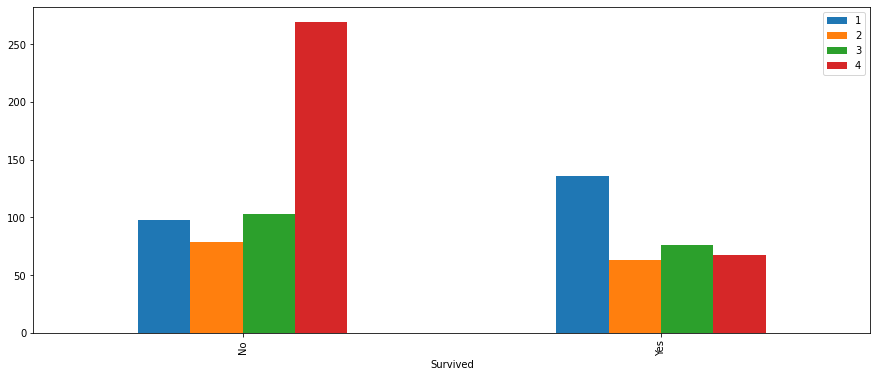

In [197]:
bar_charts(titanic1, 'FareClass')
#  It is clear than the fare had also an impact on the survival chance. For fares >30 (# 1) there was mroe chance of survival

In [198]:
titanic1.groupby(['FareClass']) [['Survived']].count()
# The table and graph show that peo

,Survived
FareClass,
1,234
2,142
3,179
4,336


In [207]:
titanic1.groupby(['Pclass','FareClass', 'Sex', 'SibSp']) [['Survived']].count()

Survived
Pclass FareClass Sex    SibSp          
1      1         female 0            42
                        1            40
                        2             3
                        3             2
                 male   0            48
...                                 ...
3      4         female 1             5
                        4             1
                 male   0           245
                        1            12
                        2             3

[63 rows x 1 columns]

## Age Class

In [ ]:
# ANSWER

In [208]:
def create_age_class(x):
    if x > 60:
        age_class = 5
    elif x > 35 and x <= 60:
        age_class = 4
    elif x > 25 and x <= 35:
        age_class = 3
    elif x > 16 and x <= 25:
        age_class = 2
    else:
        age_class = 1
    return age_class

In [209]:
titanic1['AgeClass'] = titanic1['Age'].apply(create_age_class)

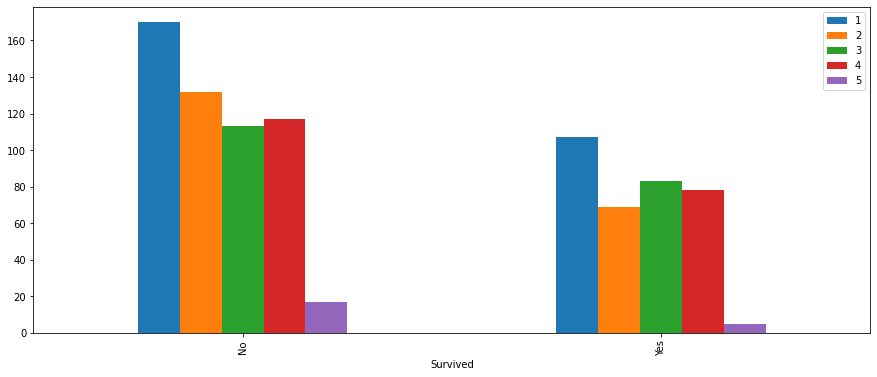

In [210]:
bar_charts(titanic1, 'AgeClass')

In [211]:
titanic1.groupby(['AgeClass']) [['Survived']].count()
# The table and graph show that peo

,Survived
AgeClass,
1,277
2,201
3,196
4,195
5,22


# Staistical Overview

In [212]:
from scipy import stats

## Correlation

Find correlation between `survived` and other features.

In [213]:
titanic1.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FareClass,AgeClass
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,0.003258,0.035025
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.307600,0.005863
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.719670,-0.352017
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.122591,0.937647
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.380692,-0.201286
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.387100,-0.054464
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.599129,0.128121
FareClass,0.003258,-0.307600,0.719670,-0.122591,-0.380692,-0.387100,-0.599129,1.000000,-0.172863
AgeClass,0.035025,0.005863,-0.352017,0.937647,-0.201286,-0.054464,0.128121,-0.172863,1.000000


In [215]:
import seaborn as sns

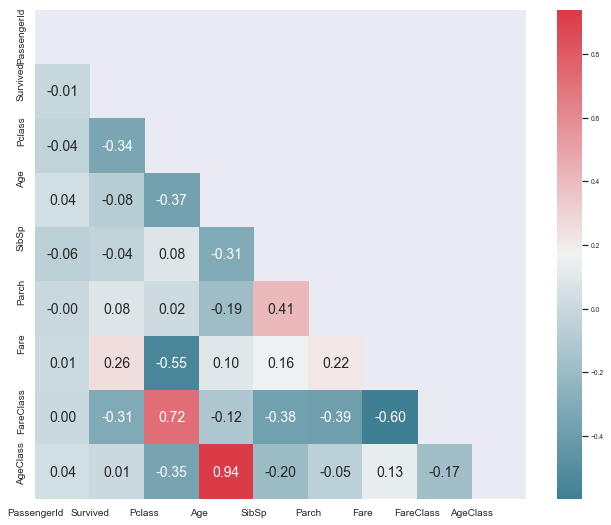

In [218]:
corr = titanic1.corr()
plt.figure(figsize=(11,9))
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True

sns.heatmap(corr, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, fmt=".2f", mask=dropSelf, annot_kws={"size":14})

sns.set(font_scale=0.6)

#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns, fontsize=10);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns, fontsize=10)
#show plot
plt.show()

In [ ]:
# The table and graph shows that the highest correlation between survival and other features was for: 1) Pclass (0.338), 2) FareClass (0.307), 3) Fare (0.257)

# [BONUS] Hypothesis Testing
---
Hypothesis testing is the use of statistics to determine the probability that a given hypothesis is true. The usual process of hypothesis testing consists of four steps.

1. Formulate the null hypothesis H_0 (commonly, that the observations are the result of pure chance) and the alternative hypothesis H_a (commonly, that the observations show a real effect combined with a component of chance variation).

2. Identify a test statistic that can be used to assess the truth of the null hypothesis.

3. Compute the P-value, which is the probability that a test statistic at least as significant as the one observed would be obtained assuming that the null hypothesis were true. The smaller the P-value, the stronger the evidence against the null hypothesis.

4. Compare the p-value to an acceptable significance value  alpha (sometimes called an alpha value). If p<=alpha, that the observed effect is statistically significant, the null hypothesis is ruled out, and the alternative hypothesis is valid.

### Define Hypothesis

> Formulate the null hypothesis H_0 (commonly, that the observations are the result of pure chance) and the alternative hypothesis H_a (commonly, that the observations show a real effect combined with a component of chance variation).

    Null Hypothesis (H0): There is no difference in the survival rate between the young and old passengers.

    Alternative Hypothesis (HA): There is a difference in the survival rate between the young and old passengers.

### Collect Data

Next step is to collect data for each population group. 

Collect two sets of data, one with the passenger greater than 35 years of age and another one with the passenger younger than 35. The sample size should ideally be the same but it can be different. Lets say that the sample sizes is 100.

In [219]:
N = 100
age = 35

In [220]:
titanic1_young = titanic1[titanic1['Age'] <= age].sample(N, random_state=42)
titanic1_old = titanic1[titanic1['Age'] > age].sample(N, random_state=42)

In [221]:
titanic1_young['Survived'].value_counts()

0    60
1    40
Name: Survived, dtype: int64

In [222]:
titanic1_old['Survived'].value_counts()

0    66
1    34
Name: Survived, dtype: int64

### Set alpha (Let alpha = 0.05)

> Identify a test statistic that can be used to assess the truth of the null hypothesis.

In [230]:
# ANSWER
alpha = 0.05

### Calculate point estimate

In [223]:
a = titanic1_young['Survived']
b = titanic1_old['Survived']

In [224]:
## Calculate the variance to get the standard deviation
var_a = a.var()
var_b = b.var()

## Calculate the Standard Deviation
s = np.sqrt((var_a + var_b)/2)

### Calculate test statistic

In [225]:
## Calculate the t-statistics
t = (a.mean() - b.mean())/(s*np.sqrt(2/N))

### Find the p-value

> Compute the P-value, which is the probability that a test statistic at least as significant as the one observed would be obtained assuming that the null hypothesis were true. The smaller the P-value, the stronger the evidence against the null hypothesis.

In [226]:
## Compare with the critical t-value
## Degrees of freedom
df = 2*N - 2

#p-value after comparison with the t 
p = 1 - stats.t.cdf(t,df=df)

In [227]:
print("t = " + str(t))
print("p = " + str(2*p))

t = 0.876037590783133
p = 0.38207114069920456


### Interpret results

> Compare the p-value to an acceptable significance value  alpha (sometimes called an alpha value). If p<=alpha, that the observed effect is statistically significant, the null hypothesis is ruled out, and the alternative hypothesis is valid.

In [228]:
def print_sig(p_value, alpha):
    if p_value < alpha:
        print("We reject our null hypothesis.")
    elif p_value > alpha:
        print("We fail to reject our null hypothesis.")
    else:
        print("Our test is inconclusive.")

In [231]:
## Cross Checking with the internal scipy function
t2, p2 = stats.ttest_ind(a,b)
print("t = " + str(t2))
print("p = " + str(p2))

print_sig(p2, alpha)

t = 0.876037590783133
p = 0.38207114069920445
We fail to reject our null hypothesis.




---



---



> > > > > > > > > © 2019 Institute of Data


---



---



